<a href="https://colab.research.google.com/github/poojak-shetty/Online_news_popularity/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have already cleaned our dataset and have kept only necessary columns.Let's now see which algorithm gives the best accuracy.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns
#importing necessary libraries is a common step

In [0]:
df = pd.read_csv('Cleaned dataset.csv')

In [126]:
df

,Unnamed: 0,LDA_02,data_channel_is_world,data_channel_is_entertainment,LDA_01,rate_negative_words,n_tokens_title,weekday_is_wednesday,weekday_is_tuesday,kw_max_max,average_token_length,weekday_is_thursday,global_rate_negative_words,min_positive_polarity,weekday_is_monday,shares
0,0,0.040005,0.0,1.0,0.378279,0.230769,12.0,0.0,0.0,0.0,4.680365,0.0,0.013699,0.100000,1.0,0
1,1,0.050096,0.0,0.0,0.050047,0.266667,9.0,0.0,0.0,0.0,4.913725,0.0,0.015686,0.033333,1.0,0
2,2,0.033351,0.0,0.0,0.033334,0.142857,9.0,0.0,0.0,0.0,4.393365,0.0,0.009479,0.100000,1.0,1
3,3,0.494651,0.0,1.0,0.419300,0.333333,9.0,0.0,0.0,0.0,4.404896,0.0,0.020716,0.136364,1.0,0
4,4,0.028575,0.0,0.0,0.028794,0.139785,13.0,0.0,0.0,0.0,4.682836,0.0,0.012127,0.033333,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,39639,0.151701,0.0,0.0,0.025001,0.277778,11.0,1.0,0.0,843300.0,4.523121,0.0,0.014451,0.100000,0.0,1
39640,39640,0.231866,0.0,0.0,0.028575,0.187500,12.0,1.0,0.0,843300.0,4.405488,0.0,0.009146,0.136364,0.0,1
39641,39641,0.025207,0.0,0.0,0.025025,0.423077,10.0,1.0,0.0,843300.0,5.076923,0.0,0.024887,0.136364,0.0,1
39642,39642,0.839987,1.0,0.0,0.040003,0.533333,6.0,1.0,0.0,843300.0,4.975073,0.0,0.023460,0.062500,0.0,0


In this csv file we have one more column named 'Unnamed:0' which occurs because its the index column in the dataset which we have saved.So,we need to remove that column.

In [0]:
df=df.loc[:, ~df.columns.str.match('Unnamed')]

In [128]:
df

,LDA_02,data_channel_is_world,data_channel_is_entertainment,LDA_01,rate_negative_words,n_tokens_title,weekday_is_wednesday,weekday_is_tuesday,kw_max_max,average_token_length,weekday_is_thursday,global_rate_negative_words,min_positive_polarity,weekday_is_monday,shares
0,0.040005,0.0,1.0,0.378279,0.230769,12.0,0.0,0.0,0.0,4.680365,0.0,0.013699,0.100000,1.0,0
1,0.050096,0.0,0.0,0.050047,0.266667,9.0,0.0,0.0,0.0,4.913725,0.0,0.015686,0.033333,1.0,0
2,0.033351,0.0,0.0,0.033334,0.142857,9.0,0.0,0.0,0.0,4.393365,0.0,0.009479,0.100000,1.0,1
3,0.494651,0.0,1.0,0.419300,0.333333,9.0,0.0,0.0,0.0,4.404896,0.0,0.020716,0.136364,1.0,0
4,0.028575,0.0,0.0,0.028794,0.139785,13.0,0.0,0.0,0.0,4.682836,0.0,0.012127,0.033333,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.151701,0.0,0.0,0.025001,0.277778,11.0,1.0,0.0,843300.0,4.523121,0.0,0.014451,0.100000,0.0,1
39640,0.231866,0.0,0.0,0.028575,0.187500,12.0,1.0,0.0,843300.0,4.405488,0.0,0.009146,0.136364,0.0,1
39641,0.025207,0.0,0.0,0.025025,0.423077,10.0,1.0,0.0,843300.0,5.076923,0.0,0.024887,0.136364,0.0,1
39642,0.839987,1.0,0.0,0.040003,0.533333,6.0,1.0,0.0,843300.0,4.975073,0.0,0.023460,0.062500,0.0,0


# **LOGISTIC REGRESSION**

Sigmoid function

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve.

A sigmoid function is a type of activation function, and more specifically defined as a squashing function. Squashing functions limit the output to a range between 0 and 1, making these functions useful in the prediction of probabilities.

In [0]:
#Sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

Error function

Calculates error using the cost function.

In [0]:
#Error function
def error(a,b,x,y):
  error = 0
  m = len(y)
  for i in range(m):
      f = (a * x[i]) + b
      error += -y[i] * np.log(sigmoid(f)) - (1-y[i]) * np.log(1-sigmoid(f))
  return error/m

Step gradient function reduces the error by going towards minima in steps this is done by analising the slope in each step.



In [0]:
#Step gradient function
def step_gradient(a,b,x,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        f = (a * x[i]) + b
        grad_a += (sigmoid(f) - y[i]) * x[i]
        grad_b += (sigmoid(f) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    return a,b

Descend function performs gradient descent



In [0]:
#Performing Gradient Descent
def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a, b, = initial_a, initial_b
    for i in range(iterations):
        e = error(a, b, x, y)
        if i % 100 == 0:
            print("Error: %4f a, b =%4f, %4f " %(e, a, b))
        a,b = step_gradient(a, b, x, y, learning_rate)
        
    return a,b

In [0]:
dff = df[[' LDA_02', ' shares']]

Normalising data to scale down the values between 0 and 1



In [0]:
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns = dff.columns)
df1=(dff-dff.min()) /(dff.max()-dff.min())

In [62]:
df1

,LDA_02,shares
0,0.043483,0.0
1,0.054453,0.0
2,0.036252,1.0
3,0.537664,0.0
4,0.031060,0.0
...,...,...
39639,0.164893,1.0
39640,0.252029,1.0
39641,0.027399,1.0
39642,0.913031,0.0


Here I am taking 1 feature i.e LDA_02 as x and target(shares) as y.



In [0]:
x=df1[" LDA_02"].values
y=df1[" shares"].values

Plotting LDA_02 vs The target

Text(0, 0.5, ' shares')

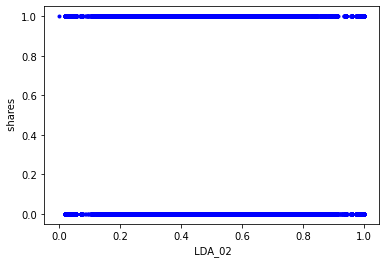

In [64]:
plt.plot(x,y,'b.')
plt.xlabel(' LDA_02')
plt.ylabel(' shares')

Splitting values into train and test dataset using train_test_split



In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

**TRAINING THE DATASET**

In [72]:
#a, b = 0,0
learning_rate = 0.001
iterations = 1000

final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations)

Error: 0.693147 a, b =0.000000, 0.000000 
Error: 4.400056 a, b =-13.226812, 12.238458 
Error: 4.400056 a, b =-13.226812, 12.238458 
Error: 4.400056 a, b =-13.226812, 12.238458 
Error: 4.400056 a, b =-13.226812, 12.238458 
Error: 4.400056 a, b =-13.226812, 12.238458 
Error: 4.400056 a, b =-13.226812, 12.238458 
Error: 4.400056 a, b =-13.226812, 12.238458 
Error: 4.400056 a, b =-13.226812, 12.238458 
Error: 4.400056 a, b =-13.226812, 12.238458 


Plotting the sigmoid curve to see whether the curve is fit into the data or not.



(0.0, 1.0)

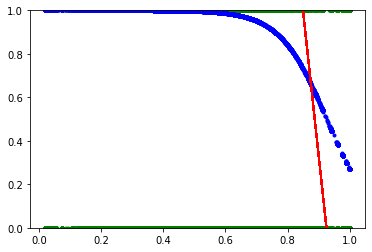

In [73]:
f = (final_a * x_train) + final_b
plt.plot(x_train, y_train, 'g.',    # The data points
         x_train, sigmoid(f), 'b.', # The Sigmoid
         x_train, f, 'r')           # the line
plt.ylim(0,1)

We observe that the curve is not fit.So,we need to try some other machine learning algorithm.

Accuracy function determines the accuracy of the model by determining the score no. of times the model has predicted correctly by using a boundary as 0.5.

In [0]:
def accuracy(a,x,b,y):
    correct = 0
    for i in range(len(x)):
        f = (a * x[i]) + b
        prediction = sigmoid(f)
        if prediction > 0.4:
            z = 1
        else:
            z = 0
        if y[i] == z:
            correct += 1
            
    print("Accuracy: {}".format(correct / len(y)))

**ACCURACY OF TRAINED DATASET**

In [75]:
accuracy(final_a, x_train, final_b, y_train)

Accuracy: 0.5085921488254769


**ACCURACY OF TEST DATASET**

In [76]:
accuracy(final_a, x_test, final_b, y_test)

Accuracy: 0.5099003657459957


# **MULTIVARIATE LOGISTIC REGRESSION**

In [0]:
#Sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [0]:
#Error function
def error(a,b,c,x1,x2,y):
  error = 0
  m = len(y)
  for i in range(m):
      f = (a * x1[i]) + (b*x2[i]) +  c
      error += -y[i] * np.log(sigmoid(f)) - (1-y[i]) * np.log(1-sigmoid(f))
  return error/m

In [0]:
#Step gradient function
def step_gradient(a,b,c,x1,x2,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(y)
    for i in range(m):
        f = (a * x1[i]) + (b*x2[i]) +  c
        grad_a += (sigmoid(f) - y[i]) * x1[i]
        grad_b += (sigmoid(f) - y[i]) * x2[i]
        grad_c += (sigmoid(f) - y[i]) 

    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)

    return a,b,c

In [0]:
#Performing Gradient Descent
def descend(init_a, init_b, init_c,x1,x2,y, learning_rate, iterations):
    a, b,c = init_a, init_b, init_c
    for i in range(iterations):
        e = error(a,b,c,x1,x2,y)
        if i % 100 == 0:
            print("Error: %4f a, b =%4f, %4f %4f " %(e, a, b, c))
        a,b,c = step_gradient(a,b,c,x1,x2,y,learning_rate)
        
    return a,b,c

In [0]:
#Accuracy function
def accuracy(a,b,c,x1,x2,y,learning_rate):
    correct = 0
    for i in range(len(y)):
        f = (a * x1[i]) + (b*x2[i])  + c
        prediction = sigmoid(f)
        if prediction > 0.5:
            z = 1
        else:
            z = 0
        if y[i] == z:
            correct += 1
            
    print("Accuracy: {}".format(correct / len(y)))

We are taking the top 2 highly correlated features.

In [0]:
dff = df[[' LDA_02', ' data_channel_is_world',  ' shares']]

In [0]:
scaler = MinMaxScaler()
df1=(dff-dff.min()) /(dff.max()-dff.min())
df_scaled = scaler.fit_transform(df1)


In [136]:
df_scaled

array([[0.04348339, 0.        , 0.        ],
       [0.0544525 , 0.        , 0.        ],
       [0.03625158, 0.        , 1.        ],
       ...,
       [0.02739931, 0.        , 1.        ],
       [0.91303053, 1.        , 0.        ],
       [0.05434833, 0.        , 0.        ]])

In [0]:
x1 = df_scaled[:,0]
x2 = df_scaled[:,1]
y = df_scaled[:,2]

In [138]:
x1

array([0.04348339, 0.0544525 , 0.03625158, ..., 0.02739931, 0.91303053,
       0.05434833])

Splitting values into train and test dataset using train_test_split



In [0]:
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(x1,x2,y,test_size=0.2)

Visualizing the features

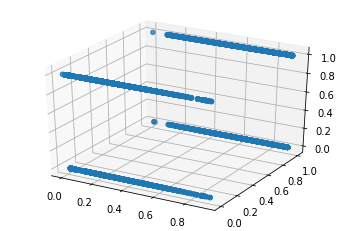

In [140]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=dff[" LDA_02"]
y=dff[" data_channel_is_world"]
z=dff[' shares']

img = ax.scatter(x, y, z)
plt.show()

Training the dataset

In [141]:
learning_rate = 0.001
iterations = 1000
a=0
b=0
c=0

descend(a,b,c,x1,x2,y, learning_rate, iterations)

Error: 0.693147 a, b =0.000000, 0.000000 0.000000 
Error: 0.000468 a, b =5.414050, 13.174839 -9.132455 
Error: 0.000337 a, b =5.262834, 13.799123 -9.449305 
Error: 0.000264 a, b =5.172135, 14.284149 -9.659184 
Error: 0.000217 a, b =5.105770, 14.674741 -9.826636 
Error: 0.000185 a, b =5.053775, 15.001229 -9.967448 
Error: 0.000161 a, b =5.011388, 15.281677 -10.089275 
Error: 0.000142 a, b =4.975864, 15.527490 -10.196753 
Error: 0.000128 a, b =4.945466, 15.746308 -10.292969 
Error: 0.000116 a, b =4.919025, 15.943488 -10.380098 


(4.895721641293747, 16.12293604483168, -10.459733545060246)

**ACCURACY OF TRAINED DATASET**

In [142]:
accuracy(a,b,c,x1_train,x2_train,y_train,learning_rate)

Accuracy: 0.5055021283304431


**ACCURACY OF TEST DATASET**

In [143]:
accuracy(a,b,c,x1_test,x2_test,y_test,learning_rate)

Accuracy: 0.5107832009080591
